In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [15]:
sheets = pd.read_excel('教育科學.xlsx', sheet_name=None, engine='openpyxl')

df = pd.DataFrame()

sheet_names = list(sheets.keys())
sheet_names.reverse()

# 將所有工作表的資料合併到一個 DataFrame 中
for sheet_name in sheet_names:  # 不包括最後一張表
    sheet_new = sheets[sheet_name]
    df = pd.concat([df, sheet_new], ignore_index=True)

print(df.columns)
df

Index(['職類名稱', '名次', '提名單位'], dtype='object')


,職類名稱,名次,提名單位
0,綜合機械,1,臺中市立臺中工業高級中等學校
1,綜合機械,2,臺中市立臺中工業高級中等學校
2,綜合機械,3,NaN
3,綜合機械,4,臺中市立大甲工業高級中等學校
4,綜合機械,5,國立羅東高級工業職業學校
...,...,...,...
2061,鑄造,4,國立成功大學附屬臺南工業高級中等學校
2062,鑄造,5,臺北市立木柵高級工業職業學校
2063,鑄造,佳作,國立彰化師範大學附屬高級工業職業學校
2064,鑄造,佳作,國立彰化師範大學附屬高級工業職業學校


In [13]:

if '提名單位' in df.columns:
    result = df['提名單位'].value_counts()
    print(result)

提名單位
臺中市立臺中工業高級中等學校             97
國立彰化師範大學附屬高級工業職業學校         75
臺北市立木柵高級工業職業學校             56
國立嘉義高級工業職業學校               46
國立臺南高級工業職業學校               42
                           ..
新北市立三重高級商工職業學校              1
財團法人新北市私立復興高級商工職業學校         1
國立成功大學附設高級工業職業進修學校          1
育達學校財團法人臺北市私立普林思頓高級中等學校     1
國立關西高級中學                    1
Name: count, Length: 207, dtype: int64


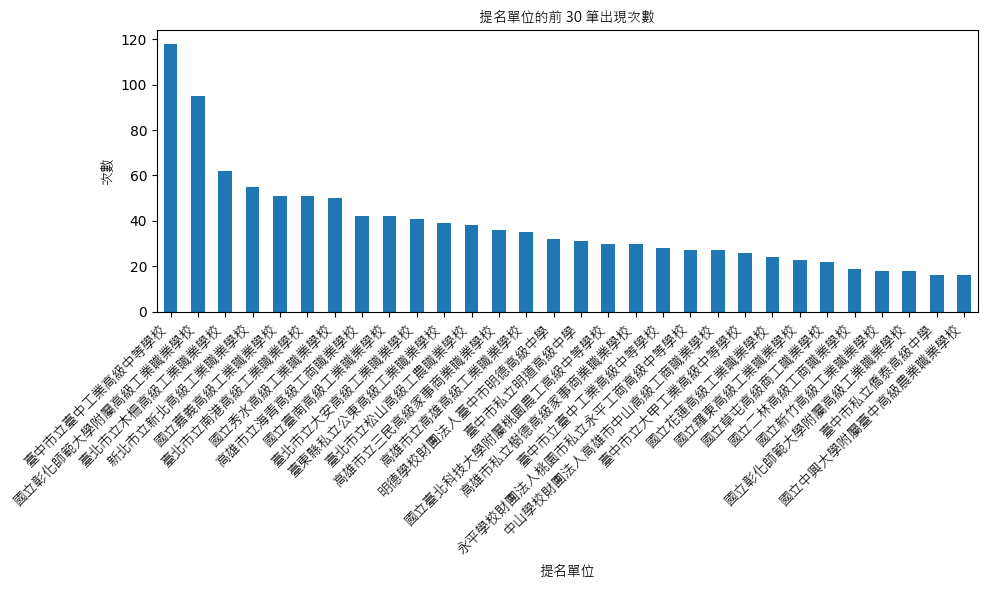

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties

# 設置字體
font_path = 'C:/Windows/Fonts/msjh.ttc'  # 微軟正黑體的字體路徑
font_prop = FontProperties(fname=font_path)

# 假設 df 已經被定義並包含 '提名單位' 列
if '提名單位' in df.columns:
    result = df['提名單位'].value_counts()

    # 繪製前 10 筆資料的條形圖
    plt.figure(figsize=(10, 6))
    result.head(30).plot(kind='bar')
    plt.title('提名單位的前 30 筆出現次數', fontproperties=font_prop)
    plt.xlabel('提名單位', fontproperties=font_prop)
    plt.ylabel('次數', fontproperties=font_prop)
    plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
    plt.tight_layout()
    plt.show()